In [16]:
"""Importowanie potrzebnych w projekcie bibliotek"""
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LAB 3 - Ekstrakcja podstawowych parametrów geometrycznych na obrazach binarnych

In [17]:
"""Definicja klasy ImageToAnalyse wraz z metodami służącymi do operacji na obrazie wejściowym"""
class ImagesToAnalyse:
    
    """Knstruktor klasy ImagesToAnalyse wywołuje metody zadeklarowane poniżej i przypisuje zwrócone wartości do odpowiednich pól obiektu"""
    def __init__(self, imSrc):
        self.sourceImage = imSrc
        self.grayImage = self.makeImageGray()
        self.binImage = self.makeImageBin()
        self.EdgeClear = self.clear(self.binImage)
        self.ObjectFill = self.fill(self.EdgeClear)
        (self.numberOfElements, self.labeledArray) = self.bwlabel()
    
    """Metoda makeImageGray służy to konwersji obrazu wejściowego do skali szarości"""
    def makeImageGray(self):
        return cv2.cvtColor(self.sourceImage, cv2.COLOR_BGR2GRAY)

    """Metoda makeImageBin służy do konwersji obrazu ze skali szarości do obrazu binarnego"""
    def makeImageBin(self):
        (tmp_thresh, tmp_bin) = cv2.threshold(self.grayImage, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        return tmp_bin

    """Metoda areaOfObject służy obliczenia pola powierzchni badanego obiektu (albo cały obraz albo pojedyńczy obiekt na obrazie jeśli podstawiony został jako obraz wejściowy)"""
    def areaOfObject(self, objectToCalc):
        return np.count_nonzero(objectToCalc)

    """Implemetacja matlabowej metody bwlabel - zwraca liczbę obiektów na obrazie oraz obraz z indeksami poszczególnych elementów"""
    def bwlabel(self):
        srcImage = self.EdgeClear
        (numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(srcImage)
        countLabels = np.count_nonzero(np.unique(labels))
        return countLabels, labels
    
    """Zwraca obraz zawierający element o wskazanym ID - przykładowo jeśli po indeksacji pojawiają się dwa elementy, a user podał ID=1 to zwróci element numer 1"""
    def getElementWithId(self, IDofEL):
        return (self.labeledArray == IDofEL) * 1

    """Metoda fill odpowiedzialna jest za wypełnienie dziór w elementach na obrazie binarnym"""
    def fill(self, srcImage):
        negateImg = np.invert(srcImage)
        clearedInv = self.clear(negateImg)
        filledResult = cv2.bitwise_or(srcImage, clearedInv)
        return filledResult

    """Metoda clear odpowiedzialna jest za czyszczenie krawędzi obrazu binarnego - usuwane są elementy styczne z krawędziami"""
    def clear(self, srcImage):
        kernel = np.ones((3, 3), np.uint8)
        base = srcImage.copy()
        [dx, dy] = base.shape
        operator = base.copy()
        operator[1:dx - 1, 1:dy - 1] = 0

        while True:
            oldOperator = operator.copy()
            operator = cv2.dilate(operator, kernel, iterations=1)
            operator = cv2.bitwise_and(operator, base)

            if (np.array_equal(operator, oldOperator)):
                result = operator
                break

        cleared = cv2.bitwise_xor(result, srcImage)
        return cleared

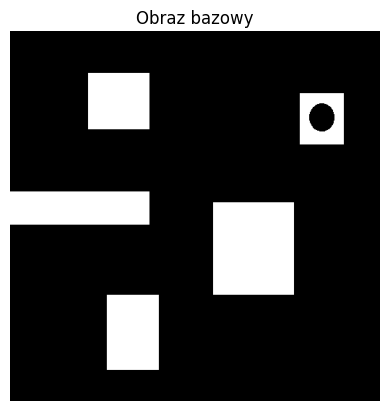

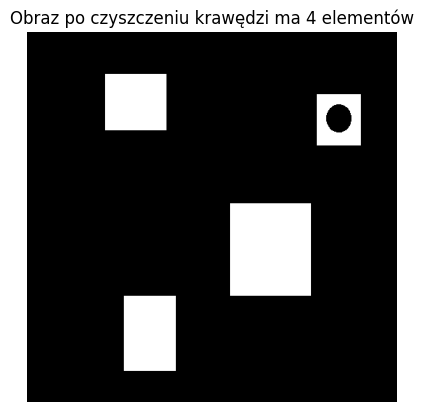

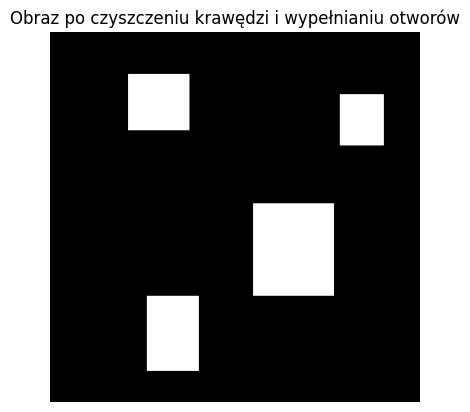

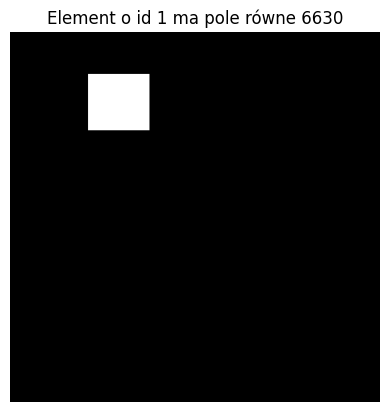

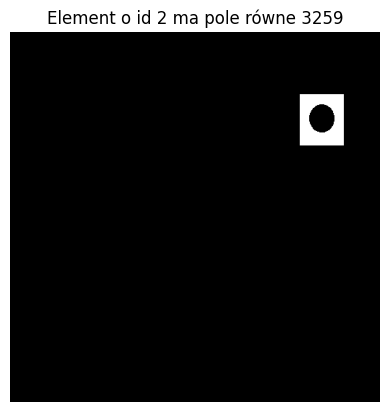

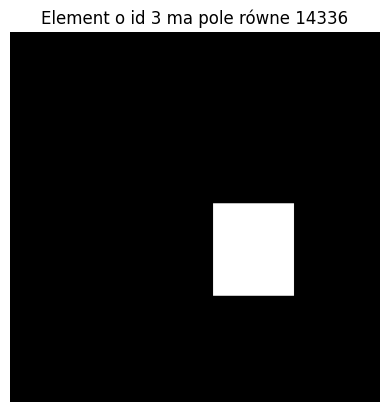

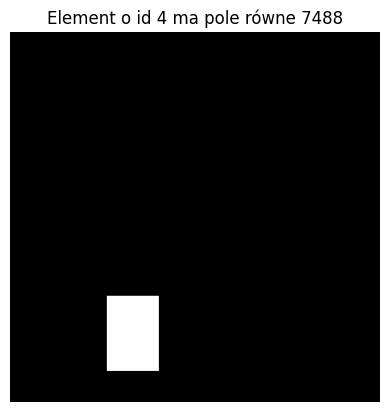

In [18]:
"""Utworzenie obiektu z klasy ImagesToAnalyse oraz wczytanie obrazu wejściowego"""
SourceImage = ImagesToAnalyse(cv2.imread("./SRC2.bmp"))

"""Wyświetlenie obrazu bazowego"""
plt.imshow(SourceImage.binImage, cmap='gray', vmin=0, vmax=255)
plt.title("Obraz bazowy")
plt.axis('off')

"""Wyświetlenie obrazu po czyszczeniu krawędzi wraz z informacją o liczbie elementów na obrazie po czysczeniu"""
plt.figure()
plt.imshow(SourceImage.EdgeClear, cmap='gray', vmin=0, vmax=255)
plt.title("Obraz po czyszczeniu krawędzi ma " + str(str(SourceImage.numberOfElements)) + " elementów")
plt.axis('off')

"""Wyświetlenie obrazu po czysczeniu krawędzi i wypełnianiu otworów"""
plt.figure()
plt.imshow(SourceImage.ObjectFill, cmap='gray', vmin=0, vmax=255)
plt.title("Obraz po czyszczeniu krawędzi i wypełnianiu otworów")
plt.axis('off')

"""Wyświetlenie wszystkich elementów na obrazie po indeksacji oraz obliczenie ich pola powierzchni"""
for i in range(1, SourceImage.numberOfElements+1):
    plt.figure()
    plt.imshow(SourceImage.getElementWithId(i), cmap='gray', vmin=0, vmax=1)
    plt.title("Element o id " + str(i) + " ma pole równe " + str(SourceImage.areaOfObject(SourceImage.getElementWithId(i))))
    plt.axis('off')